In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import nltk
from nltk.corpus import stopwords
import re
import string


In [149]:
df=pd.read_excel('review.xls')
df.head()

,Unnamed: 0,Rating,Comment,Review
0,0,4,Nice product,Excellent product under 50k. But it is overhea...
1,1,4,Worst experience ever!,"This is damn slow, even i ain't install anythi..."
2,2,4,Good quality product,Awesome lappy
3,3,4,Did not meet expectations,Never ever try to go for it!!\nThe most disgus...
4,4,5,Not recommended at all,"Battery is not good, performance also."


In [150]:
#droping unnecessary column
df.drop('Unnamed: 0',inplace=True,axis=1)

# Data Preprocessing

In [151]:
df.shape

(24635, 3)

There are 24635 rows and 3 columns in the data set

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24635 entries, 0 to 24634
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rating   24635 non-null  object
 1   Comment  22097 non-null  object
 2   Review   22127 non-null  object
dtypes: object(3)
memory usage: 577.5+ KB


All the columns are categorical 

In [153]:
df.isnull().sum()

Rating        0
Comment    2538
Review     2508
dtype: int64

In [154]:
p=(2500/24635)*100
p

10.148163182463973

10 % data is null so we can drop these na to avoid wrong prediction

In [155]:
df.dropna(axis=0,inplace=True)

In [156]:
df.shape

(22042, 3)

In [157]:
df.isnull().sum()

Rating     0
Comment    0
Review     0
dtype: int64

So we do not have null values 

In [158]:
df['Rating'].value_counts()

5    8385
4    4815
3    3265
1    3004
2    2573
Name: Rating, dtype: int64

We have to combine the 'Comment' and 'Review' columns

In [159]:
df['Reviews']=df['Comment']+ df['Review']

In [160]:
df.head()

,Rating,Comment,Review,Reviews
0,4,Nice product,Excellent product under 50k. But it is overhea...,Nice productExcellent product under 50k. But i...
1,4,Worst experience ever!,"This is damn slow, even i ain't install anythi...","Worst experience ever!This is damn slow, even ..."
2,4,Good quality product,Awesome lappy,Good quality productAwesome lappy
3,4,Did not meet expectations,Never ever try to go for it!!\nThe most disgus...,Did not meet expectationsNever ever try to go ...
4,5,Not recommended at all,"Battery is not good, performance also.","Not recommended at allBattery is not good, per..."


In [161]:
# Dropping the columns after concating 
df.drop(['Comment','Review'],inplace=True,axis=1)

In [162]:
df.head()

,Rating,Reviews
0,4,Nice productExcellent product under 50k. But i...
1,4,"Worst experience ever!This is damn slow, even ..."
2,4,Good quality productAwesome lappy
3,4,Did not meet expectationsNever ever try to go ...
4,5,"Not recommended at allBattery is not good, per..."


In [163]:
stop_words=set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [164]:
# defining a function for cleaning of data 
def data_clean(data):
    text=re.sub(r'@[A-Za-z0-9]+','',data)
    text=re.sub('#','',text)
    text=re.sub(r"'s\b",'',text)
    text=re.sub(r'[%$#@&}{]','',text)
    text=re.sub(r'[.,:;!]','',text)
    text=re.sub("[^a-zA-Z]",' ',text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text)
    text=text.lower()
    text=[i for i in text.split() if not i in stop_words]
    clean_text=''
    for i in text:
        clean_text=clean_text + lemmatizer.lemmatize(i)+ ' '
    
    return clean_text.strip()

In [165]:
clean_data=[]
for i in df['Reviews']:
    clean_data.append(data_clean(i))

In [166]:
df['Review']=clean_data

In [167]:
df.head()

,Rating,Reviews,Review
0,4,Nice productExcellent product under 50k. But i...,nice productexcellent product k overheatingthe...
1,4,"Worst experience ever!This is damn slow, even ...",worst experience everthis damn slow even insta...
2,4,Good quality productAwesome lappy,good quality productawesome lappy
3,4,Did not meet expectationsNever ever try to go ...,meet expectationsnever ever try go disgusting ...
4,5,"Not recommended at allBattery is not good, per...",recommended allbattery good performance also


In [168]:
df.drop('Reviews',inplace=True,axis=1)

In [169]:
df['Review'][0]

'nice productexcellent product k overheatingthen little bit lagging'

In [170]:
#Arbitrary checking 
df['Review'][20]

'classy productamazing laptop aspect meeting expectation every way'

In [171]:
df['Rating']=df['Rating'].str.strip()

In [172]:
df['Rating']=df['Rating'].astype('int')

# EDA

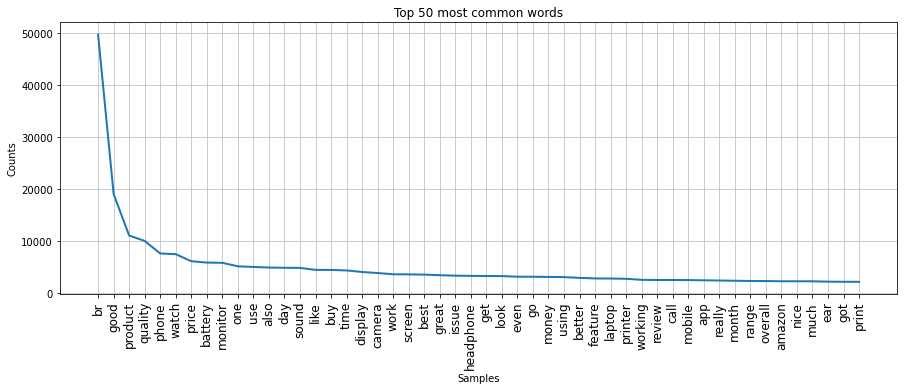

<AxesSubplot:title={'center':'Top 50 most common words'}, xlabel='Samples', ylabel='Counts'>

In [173]:
all_words = []
for line in list(df['Review']):
    words = line.split()
    for word in words:
        all_words.append(word)
plt.figure(figsize =(15,5))
plt.title('Top 50 most common words')
plt.xticks(fontsize = 12, rotation =90)
fd = nltk.FreqDist(all_words)
fd.plot(50, cumulative=False)

These are top 50 words used in the reviews by users


In [174]:
#!pip install wordcloud

# Word Cloud

In [175]:
from wordcloud import WordCloud

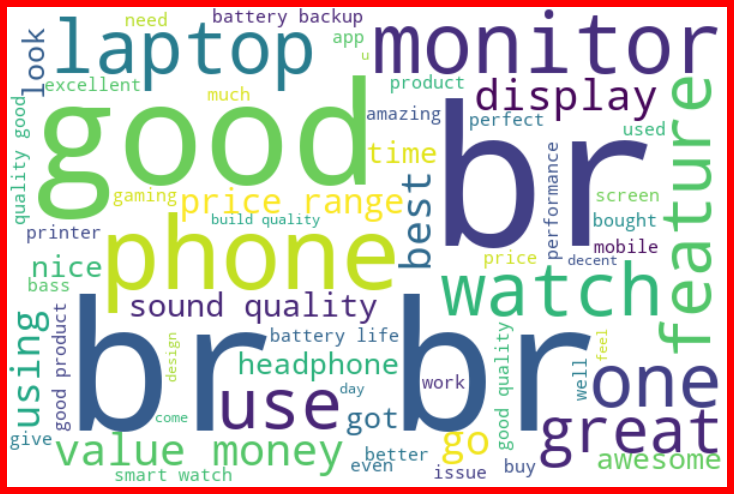

In [176]:
#showing the wordcloud with rating 5
word=df['Review'][df['Rating']==5]
#word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

word_cloud=WordCloud(width=600,height=400,background_color='white',max_words=60).generate(' '.join(word))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


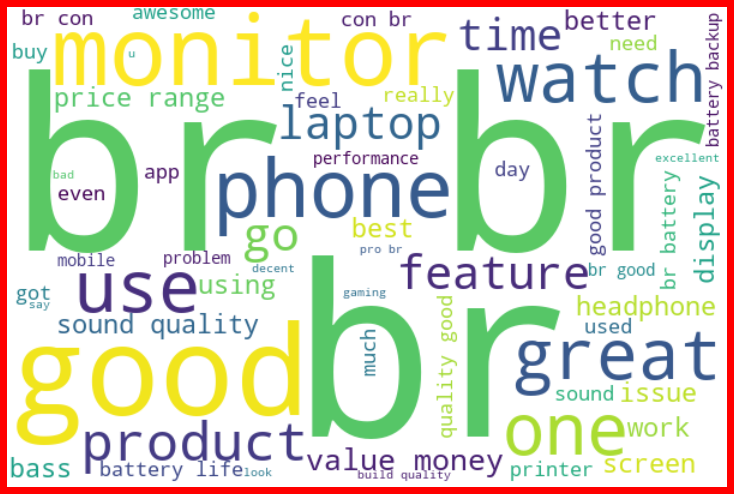

In [177]:
#showing the wordcloud with rating 4
word=df['Review'][df['Rating']==4]
#word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

word_cloud=WordCloud(width=600,height=400,background_color='white',max_words=60).generate(' '.join(word))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


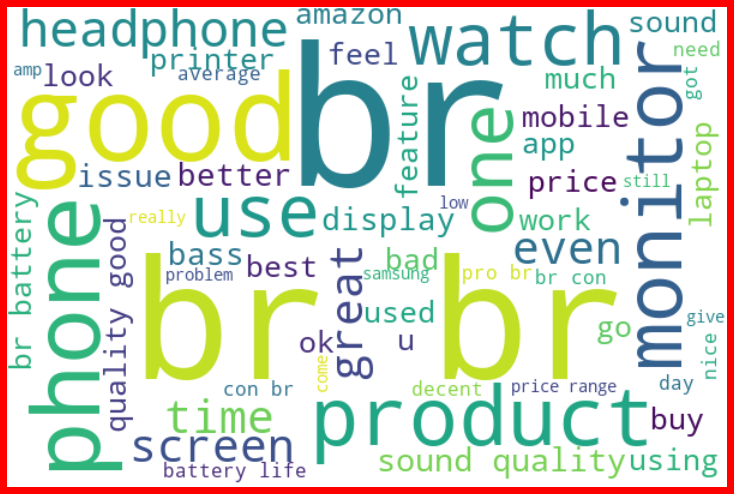

In [178]:
#showing the wordcloud with rating 3
word=df['Review'][df['Rating']==3]
#word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

word_cloud=WordCloud(width=600,height=400,background_color='white',max_words=60).generate(' '.join(word))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


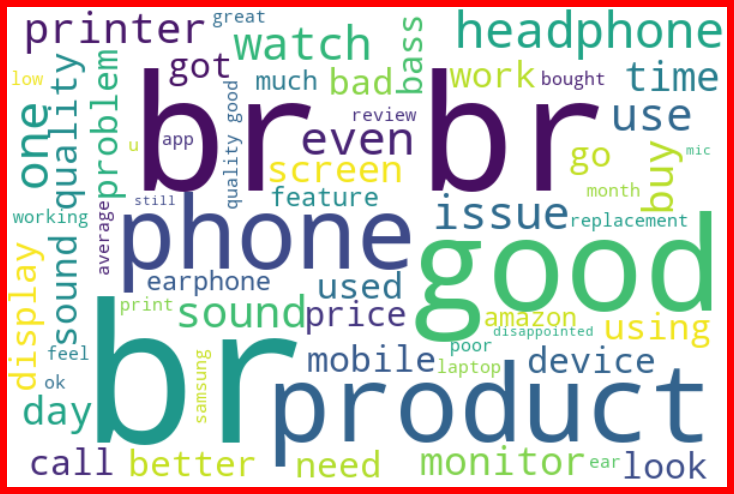

In [179]:
#showing the wordcloud with rating 2
word=df['Review'][df['Rating']==2]
#word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

word_cloud=WordCloud(width=600,height=400,background_color='white',max_words=60).generate(' '.join(word))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


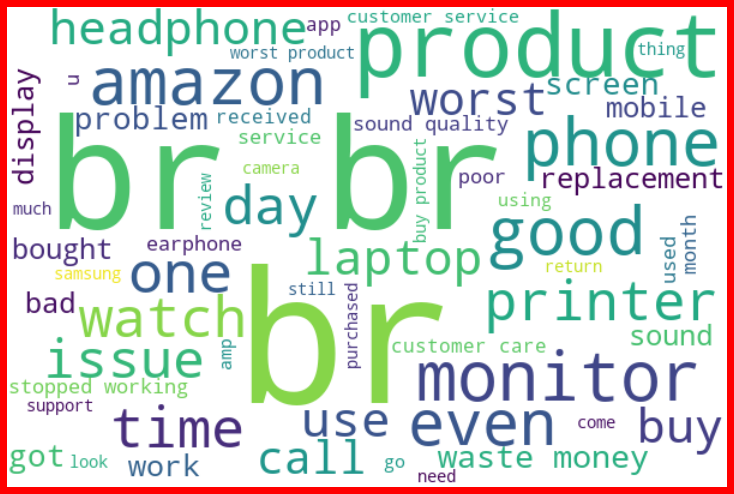

In [180]:
#showing the wordcloud with rating 1
word=df['Review'][df['Rating']==1]
#word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

word_cloud=WordCloud(width=600,height=400,background_color='white',max_words=60).generate(' '.join(word))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


# Word Count

In [181]:
# Creating column for word counts in the text
df['Review_WordCount'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WordCount','Review']].head()

,Review_WordCount,Review
0,8,nice productexcellent product k overheatingthe...
1,17,worst experience everthis damn slow even insta...
2,4,good quality productawesome lappy
3,8,meet expectationsnever ever try go disgusting ...
4,5,recommended allbattery good performance also


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


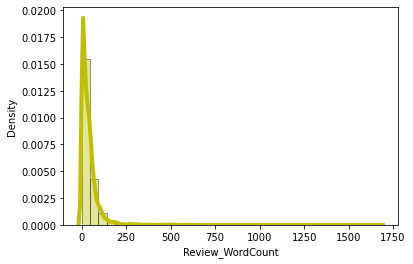

In [182]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

We can observe the maximum review word range is (0,250)

# Model Building and Evaluation

In [183]:
# Separating feature and label
x=df['Review']
y=df['Rating']

# Converting text data into vectors using Tfidf Vectorizer:

In [184]:
# word vectorizing using Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer=TfidfVectorizer(
                    sublinear_tf=True,
                    strip_accents='unicode',
                    analyzer='word',
                    token_pattern=r'\w{1,}',
                    stop_words='english',
                    ngram_range=(1,3),
                    max_features=10000)
word_vectorizer.fit(x)
train_word_features=word_vectorizer.transform(x)

In [186]:
X=train_word_features
y=df['Rating']

In [187]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [188]:
X_balanced,y_balanced = smote.fit_resample(X,y)
print(X.shape)
print(y.shape)

# check shape after oversampling  
print(X_balanced.shape)
print(y_balanced.shape)



(22042, 10000)
(22042,)
(41925, 10000)
(41925,)


In [189]:
# split data into train and test. Model will be build on training data and tested on test data.

x_train,x_test,y_train,y_test = train_test_split(X_balanced,y_balanced,test_size=0.25,random_state=42)



In [190]:
#creating a function to train and test the model with accuracy
def buildModel(model):
    print(model)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,pred)*100

    print(f"Accuracy Score:", accuracy)
    print("---------------------------------------------------")

    #confusion matrix & classification report
    
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
    print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")



In [191]:
# testing the models using for loop
for model in [DTC,ETC,KNC,RNC,RFC]:
    buildModel(model)

DecisionTreeClassifier()
Accuracy Score: 72.19996183934364
---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.83      0.86      0.85      2082
           2       0.82      0.81      0.81      2069
           3       0.72      0.71      0.71      2099
           4       0.60      0.61      0.60      2090
           5       0.65      0.63      0.64      2142

    accuracy                           0.72     10482
   macro avg       0.72      0.72      0.72     10482
weighted avg       0.72      0.72      0.72     10482

Confusion Matrix : 
 [[1789  118   83   57   35]
 [ 131 1671  100   97   70]
 [  85  115 1493  221  185]
 [  78   74  232 1266  440]
 [  69   69  180  475 1349]]

ExtraTreeClassifier()
Accuracy Score: 70.33008967754245
---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.8

# Cross validation Score 

In [195]:
# Defning function cross_val to find cv score of models
def cross_var(model):
    print(model)
    scores = cross_val_score(model,X_balanced,y_balanced, cv = 3).mean()*100
    print("Cross validation score :", scores)



In [196]:
# testing the models using for loop
for model in [DTC,ETC,KNC,RNC,RFC]:
    cross_var(model)

DecisionTreeClassifier()
Cross validation score : 62.94096601073345
ExtraTreeClassifier()
Cross validation score : 63.13655336911152
KNeighborsClassifier()
Cross validation score : 61.37388193202147
RadiusNeighborsClassifier()
Cross validation score : 27.618366129994037
RandomForestClassifier()
Cross validation score : 73.57423971377459


In [198]:
accuracy =[72.19,70.33,65.15,25.51,81.8]
cross_val_score=[62.94,63.1,61.37,27.61,73.57]

model=['Decision Tree','Extra Tree','KNeighbor','Radious Neighbor','Random Forest']
best_model=pd.DataFrame({'Model':model,'Accuracy':accuracy,'Cross validation score':cross_val_score})
best_model

,Model,Accuracy,Cross validation score
0,Decision Tree,72.19,62.94
1,Extra Tree,70.33,63.10
2,KNeighbor,65.15,61.37
3,Radious Neighbor,25.51,27.61
4,Random Forest,81.80,73.57


So we can observe that the Random Forest Classifier is the best model with 
81% accuracy and 73 % cross validation score 

# Hyper Parameter Tuning

In [209]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,200,300],'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_split':[2,3,4,5],'max_features':['auto','sqrt','log2']}


In [210]:
GSV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [211]:
GSV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [202]:
GSV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_split': 2,
 'n_estimators': 200}

In [208]:
final_mod=RandomForestClassifier()
buildModel(final_mod)

RandomForestClassifier()
Accuracy Score: 81.740125930166
---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.88      0.96      0.91      2082
           2       0.96      0.90      0.93      2069
           3       0.82      0.82      0.82      2099
           4       0.72      0.67      0.69      2090
           5       0.71      0.74      0.73      2142

    accuracy                           0.82     10482
   macro avg       0.82      0.82      0.82     10482
weighted avg       0.82      0.82      0.82     10482

Confusion Matrix : 
 [[1989   16   36   17   24]
 [  96 1869   55   21   28]
 [  75   30 1731  119  144]
 [  61   16  173 1395  445]
 [  51   19  110  378 1584]]



# Model Saving

In [212]:
import joblib
joblib.dump(final_mod,'Rating_prediction.obj')

['Rating_prediction.obj']